In [4]:
# Import packages
from pprintjson import pprintjson as ppjson 
import pandas as pd 
from habanero import Crossref
import os 
import earthpy as et 
from urllib.error import HTTPError
import matplotlib.pyplot as plt 

In [5]:
# Upload USGS spreadsheet as csv to have publication DOIs readily available as well as to incororate new information to add 
# obtain pathway to spreadsheet 
os.chdir(os.path.join(et.io.HOME, "documents", "work"))
os.getcwd()

'C:\\Users\\Taylor Hunt\\documents\\work'

In [6]:
# upload file and then present as dataframe 
fname = os.path.join("doi_dr_pubs.csv")
dr_doi_pubs = pd.read_csv(fname)
dr_doi_pubs[:10]

,ID,dr_doi,primary,rel_pub_url
0,0,doi:10.5066/P90QU56J,True,https://doi.org/10.1021/acs.est.8b07227
1,1,doi:10.5066/F73R0R24,True,https://doi.org/10.1007/s13157-017-0895-3
2,2,doi:10.5066/F7VQ30RM,True,https://doi.org/10.1002/etc.3391
3,3,doi:10.5066/F71G0JF6,True,https://doi.org/10.3133/sim3378
4,4,doi:10.5066/F7571931,True,https://doi.org/10.3133/sir20155164
5,5,doi:10.5066/F7H41QB6,True,https://doi.org/10.1186/s40317-018-0145-3
6,6,doi:10.5066/P9MR4XN4,True,https://doi.org/10.5066/P9MR4XN4
7,7,doi:10.5066/P93ZFTZI,True,https://doi.org/10.1002/ece3.5146
8,8,doi:10.5066/F74T6GVD,True,https://doi.org/10.1016/j.envpol.2017.08.070
9,9,doi:10.5066/P9GRF34E,True,https://doi.org/10.1002/eap.1912


## Column defintions:
* **dr_doi:** Data release digital object identifier from USGS (prefix is 10.5066) that is directly related to the related publication
* **rel_pub_url:** Related publication URL, the doi that is direclty related USGS data release 

In [7]:
# Code below adapted from:
# https://habanero.readthedocs.io/en/latest/modules/crossref.html#habanero.Crossref.works
cr = Crossref()

In [8]:
# Example publication: https://api.crossref.org/works/10.1021/acs.est.8b07227 
# To show the return of infortion from Crossref 
result = cr.works(ids = '10.1021/acs.est.8b07227')

In [9]:
# prettyprint is used to see a more human readable result 
ppjson(result)

{
    "status": "ok",
    "message-type": "work",
    "message-version": "1.0.0",
    "message": {
        "indexed": {
            "date-parts": [
                [
                    2020,
                    4,
                    24
                ]
            ],
            "date-time": "2020-04-24T19:23:29Z",
            "timestamp": 1587756209612
        },
        "reference-count": 67,
        "publisher": "American Chemical Society (ACS)",
        "issue": "9",
        "funder": [
            {
                "DOI": "10.13039/100007149",
                "name": "U.S. Bureau of Land Management",
                "doi-asserted-by": "publisher",
                "award": []
            },
            {
                "DOI": "10.13039/100000203",
                "name": "U.S. Geological Survey",
                "doi-asserted-by": "publisher",
                "award": []
            }
        ],
        "content-domain": {
            "domain": [],
            "crossmark-restri

In [10]:
# Most relevant information contained within "message"
ppjson(result["message"])

{
    "indexed": {
        "date-parts": [
            [
                2020,
                4,
                24
            ]
        ],
        "date-time": "2020-04-24T19:23:29Z",
        "timestamp": 1587756209612
    },
    "reference-count": 67,
    "publisher": "American Chemical Society (ACS)",
    "issue": "9",
    "funder": [
        {
            "DOI": "10.13039/100007149",
            "name": "U.S. Bureau of Land Management",
            "doi-asserted-by": "publisher",
            "award": []
        },
        {
            "DOI": "10.13039/100000203",
            "name": "U.S. Geological Survey",
            "doi-asserted-by": "publisher",
            "award": []
        }
    ],
    "content-domain": {
        "domain": [],
        "crossmark-restriction": false
    },
    "short-container-title": [
        "Environ. Sci. Technol."
    ],
    "published-print": {
        "date-parts": [
            [
                2019,
                5,
                7
       

In [11]:
# Get publication DOI from within the message 
result["message"]["DOI"]

'10.1021/acs.est.8b07227'

In [12]:
# Get publication date 
result["message"]["published-online"]["date-parts"][0]

[2019, 3, 29]

In [13]:
# To get just the year of the publication date 
result["message"]["published-online"]["date-parts"][0][0]

2019

In [14]:
# Get title of publication
result["message"]["title"][0]

'Mercury Exposure and Altered Parental Nesting Behavior in a Wild Songbird'

In [15]:
# Get publisher
result["message"]["publisher"]

'American Chemical Society (ACS)'

In [16]:
# This example contains reference count but not list of references  
result["message"]["references-count"]

67

In [17]:
# Code does not execute because this info is not available for this publication
#result["message"]["reference"]

## Example of publication with full reference list 

In [18]:
result = cr.works(ids = 'https://doi.org/10.1007/s13157-017-0895-3')

In [19]:
# This example contains the actual list of references
# Note key for last entry in reference: "key": "895_CR89"
ppjson(result["message"]["reference"])

[
    {
        "key": "895_CR1",
        "unstructured": "Baldwin BG (2002) The Jepson Desert manual: vascular plants of southeastern California. Univ of California Press, Oakland CA"
    },
    {
        "key": "895_CR2",
        "doi-asserted-by": "publisher",
        "first-page": "1533",
        "DOI": "10.1111/j.0030-1299.2008.16776.x",
        "volume": "117",
        "author": "M Bernhardt-R\u00f6mermann",
        "year": "2008",
        "unstructured": "Bernhardt-R\u00f6mermann M, R\u00f6mermann C, Nuske R, Parth A, Klotz S, Schmidt W, Stadler J (2008) On the identification of the most suitable traits for plant functional trait analyses. Oikos 117:1533\u20131541",
        "journal-title": "Oikos"
    },
    {
        "key": "895_CR3",
        "doi-asserted-by": "publisher",
        "first-page": "287",
        "DOI": "10.1007/BF00540195",
        "volume": "45",
        "author": "TW Boutton",
        "year": "1980",
        "unstructured": "Boutton TW, Harrison AT, Smith BN (

In [20]:
# In order to pull out DOIs from reference count a loop will be implemented
x = 0
for i in result["message"]["reference"]:
    try:
        print(result["message"]["reference"][x]["DOI"])
    except: 
        print("no DOI")
    x+=1

no DOI
10.1111/j.0030-1299.2008.16776.x
10.1007/BF00540195
no DOI
10.1093/treephys/24.8.891
10.1111/j.1461-0248.2009.01285.x
10.1002/ecy.1453
10.1890/07-1134.1
10.1890/0012-9658(2006)87[1465:ATTFHF]2.0.CO;2
10.1126/science.199.4335.1302
10.1038/nature16489
no DOI
10.1007/BF00347821
10.1029/2011GL050762
no DOI
10.1007/s11258-016-0628-3
no DOI
10.1086/283244
no DOI
10.1111/j.1469-185X.1977.tb01347.x
10.1890/0012-9658(2000)081[2149:COSSOP]2.0.CO;2
10.1007/s004420100628
10.1111/j.0022-0477.2004.00918.x
10.1073/pnas.0404500101
10.3133/ofr20061243
10.1371/journal.pone.0056033
10.1890/ES15-00064.1
10.1086/628592
no DOI
10.1007/s00442-008-0965-6
no DOI
10.1111/jvs.12066
10.2307/2259725
10.1111/j.1442-9993.2009.01988.x
10.1890/13-1965.1
10.1046/j.1365-2435.2002.00664.x
10.2307/2261604
10.1104/pp.16.00829
10.1016/j.tree.2003.10.002
no DOI
10.1111/j.1365-3040.2005.01433.x
10.5066/F73R0R24
no DOI
10.1890/12-0303.1
10.1111/j.1365-2427.2009.02206.x
10.1111/j.1461-0248.2010.01476.x
10.1111/j.1469-813

In [21]:
# Note that we are looking for the DOI with the prefix 10.5066, this will have to be incorporated into the loop eventually.
# First we may want to know what related publications have references attached to them and then added to the new spreadsheet

In [22]:
# This will be done via funtion and list comprehension 
# in this function it is asking each related publication url if there is a reference/citations list attached in Crossref api  
# the try is asking to query doi information from crossref
# if there publication DOI isnt able to be queried then the return will be none  
# If  the result can be queried then it will give a true or false statement on whether there is a reference list attahced    
def crossref_has_citations(doi):
    """ 
    
    Parameters
    ----------
    doi : string
        Digital Object Identifier (DOI) formatted as a URL.
    
    Returns
    ------
    doi : string
        will the Digital Object Identifier (DOI) fromatted as a URL have a refernece list attached True if yes 
        False if no and None if N/A.
    """ 
    try: 
        result = cr.works(ids = doi)
    except:
        return None
    return "reference" in result["message"] 
    #return result["message"]["reference"] is return looking for reference key or just reference 

In [23]:
crossref_has_citations("https://doi.org/10.1021/acs.est.8b07227")

False

In [24]:
# list comprehension examples
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
# list comprehension examples 
[i*2 for i in range(10)]

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [26]:
# Now recalling the USGS spread sheet dr_doi_pubs to implement function and list comphension for the column rel_pub_url
[doi for doi in dr_doi_pubs["rel_pub_url"]]

['https://doi.org/10.1021/acs.est.8b07227',
 'https://doi.org/10.1007/s13157-017-0895-3',
 'https://doi.org/10.1002/etc.3391',
 'https://doi.org/10.3133/sim3378',
 'https://doi.org/10.3133/sir20155164',
 'https://doi.org/10.1186/s40317-018-0145-3',
 'https://doi.org/10.5066/P9MR4XN4',
 'https://doi.org/10.1002/ece3.5146',
 'https://doi.org/10.1016/j.envpol.2017.08.070',
 'https://doi.org/10.1002/eap.1912',
 'https://doi.org/10.1002/ecs2.2095',
 'https://doi.org/10.1021/acs.est.7b04076',
 'https://doi.org/10.3996/042016-JFWM-029',
 'https://doi.org/10.3133/sir20175064',
 'https://doi.org/10.1177/0361198118822821',
 'https://doi.org/10.3133/ds1048',
 'https://doi.org/10.1002/ecs2.1582',
 'https://doi.org/10.3133/ofr20191054',
 'https://doi.org/10.1111/1365-2745.12901',
 'https://doi.org/10.3133/ofr20181123',
 'https://doi.org/10.1111/cobi.12569',
 'https://doi.org/10.1002/nafm.10373',
 'https://doi.org/10.1016/j.ecss.2018.01.006',
 'https://doi.org/10.1111/1752-1688.12603',
 'https://doi

In [27]:
# now calling the function to the list comprehension 
[crossref_has_citations(doi) for doi in dr_doi_pubs["rel_pub_url"]]

[False,
 True,
 True,
 False,
 False,
 True,
 None,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 None,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 None,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,


In [28]:
# with this new information, it now needs to be added to the spread sheet 
dr_doi_pubs["rel_pub_has_ref"] = [crossref_has_citations(doi) for doi in dr_doi_pubs["rel_pub_url"]]

In [29]:
# updated spreadsheet
dr_doi_pubs

,ID,dr_doi,primary,rel_pub_url,rel_pub_has_ref
0,0,doi:10.5066/P90QU56J,True,https://doi.org/10.1021/acs.est.8b07227,False
1,1,doi:10.5066/F73R0R24,True,https://doi.org/10.1007/s13157-017-0895-3,True
2,2,doi:10.5066/F7VQ30RM,True,https://doi.org/10.1002/etc.3391,True
3,3,doi:10.5066/F71G0JF6,True,https://doi.org/10.3133/sim3378,False
4,4,doi:10.5066/F7571931,True,https://doi.org/10.3133/sir20155164,False
...,...,...,...,...,...
1349,1349,doi:10.5066/P9D5IP0G,True,https://doi.org/10.1186/s40462-019-0178-0,True
1350,1350,doi:10.5066/F7JH3KBD,True,https://doi.org/10.3133/sir20175135,False
1351,1351,doi:10.5066/P9V9AORH,True,https://doi.org/10.1371/journal.pone.0197584,True
1352,1352,doi:10.5066/P9BS882S,True,https://doi.org/10.3133/sim3423,False


In [30]:
has_ref = dr_doi_pubs.rel_pub_has_ref.value_counts()
has_ref = has_ref.to_frame()
has_ref


,rel_pub_has_ref
False,813
True,486


In [31]:
has_ref = dr_doi_pubs.groupby(['rel_pub_has_ref'])[['ID']].count() 
has_ref

,ID
rel_pub_has_ref,
False,813
True,486


In [32]:
has_ref_no_index = has_ref.reset_index()
has_ref_no_index

,rel_pub_has_ref,ID
0,False,813
1,True,486


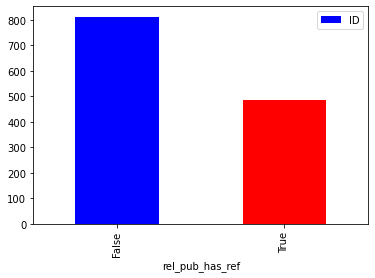

In [33]:
f, ax = plt.subplots()
has_ref_no_index.plot(color=["blue", "red"],
             kind="bar",
             x="rel_pub_has_ref",
             y="ID",
              ax=ax)
ax.legend()

### Potentential columns to be added 
* Journal Name - this can be done using the same list 
* Publisher information 
* USGS pub - True/False statement 
* Was a 10.5066 DOI prefix found in references list  


In [34]:
# Jounral names/titles to be added to spreadsheet 

In [35]:
def crossref_get_title(doi):
    try: 
        result = cr.works(ids = doi)
    except:
        return None
    return result["message"].get("title")[0]

In [36]:
crossref_get_title("https://doi.org/10.1021/acs.est.8b07227")

'Mercury Exposure and Altered Parental Nesting Behavior in a Wild Songbird'

In [37]:
[crossref_get_title(doi) for doi in dr_doi_pubs["rel_pub_url"]]

['Mercury Exposure and Altered Parental Nesting Behavior in a Wild Songbird',
 'Changes in Community-Level Riparian Plant Traits over Inundation Gradients, Colorado River, Grand Canyon',
 'Spatial and temporal variation in microcystin occurrence in wadeable streams in the southeastern United States',
 'Hydrogeologic characteristics and geospatial analysis of water-table changes in the alluvium of the lower Arkansas River Valley, southeastern Colorado, 2002, 2008, and 2015',
 'Volcanic aquifers of Hawai‘i—Hydrogeology, water budgets, and conceptual models',
 'Evaluating GPS biologging technology for studying spatial ecology of large constricting snakes',
 None,
 'Sitting ducklings: Timing of hatch, nest departure, and predation risk for dabbling duck broods',
 'Widespread legacy brine contamination from oil production reduces survival of chorus frog larvae',
 'Influences of potential oil and gas development and future climate on Sage‐grouse declines and redistribution',
 'Preparing for 

In [38]:
dr_doi_pubs["journal_name"] = [crossref_get_title(doi) for doi in dr_doi_pubs["rel_pub_url"]]
dr_doi_pubs

,ID,dr_doi,primary,rel_pub_url,rel_pub_has_ref,journal_name
0,0,doi:10.5066/P90QU56J,True,https://doi.org/10.1021/acs.est.8b07227,False,Mercury Exposure and Altered Parental Nesting ...
1,1,doi:10.5066/F73R0R24,True,https://doi.org/10.1007/s13157-017-0895-3,True,Changes in Community-Level Riparian Plant Trai...
2,2,doi:10.5066/F7VQ30RM,True,https://doi.org/10.1002/etc.3391,True,Spatial and temporal variation in microcystin ...
3,3,doi:10.5066/F71G0JF6,True,https://doi.org/10.3133/sim3378,False,Hydrogeologic characteristics and geospatial a...
4,4,doi:10.5066/F7571931,True,https://doi.org/10.3133/sir20155164,False,"Volcanic aquifers of Hawai‘i—Hydrogeology, wat..."
...,...,...,...,...,...,...
1349,1349,doi:10.5066/P9D5IP0G,True,https://doi.org/10.1186/s40462-019-0178-0,True,Tropical cyclones alter short-term activity pa...
1350,1350,doi:10.5066/F7JH3KBD,True,https://doi.org/10.3133/sir20175135,False,"Hydrogeology of, simulation of groundwater flo..."
1351,1351,doi:10.5066/P9V9AORH,True,https://doi.org/10.1371/journal.pone.0197584,True,Isotope niche dimension and trophic overlap be...
1352,1352,doi:10.5066/P9BS882S,True,https://doi.org/10.3133/sim3423,False,Delineation of selected lithologic units using...


In [39]:
def crossref_get_title(row):
    try: 
        result = cr.works(ids = row["rel_pub_url"])
    except:
        return "pub not found" 
    return result["message"].get("title")[0]

In [40]:
dr_doi_pubs.apply(crossref_get_title, axis=1)

0       Mercury Exposure and Altered Parental Nesting ...
1       Changes in Community-Level Riparian Plant Trai...
2       Spatial and temporal variation in microcystin ...
3       Hydrogeologic characteristics and geospatial a...
4       Volcanic aquifers of Hawai‘i—Hydrogeology, wat...
                              ...                        
1349    Tropical cyclones alter short-term activity pa...
1350    Hydrogeology of, simulation of groundwater flo...
1351    Isotope niche dimension and trophic overlap be...
1352    Delineation of selected lithologic units using...
1353    Estimated use of water in Georgia for 2015 and...
Length: 1354, dtype: object

In [41]:
def crossref_get_publisher(doi):
    try: 
        result = cr.works(ids = doi)
    except:
        return None
    return result["message"].get("publisher")

In [42]:
crossref_get_publisher("https://doi.org/10.1021/acs.est.8b07227")

'American Chemical Society (ACS)'

In [43]:
[crossref_get_publisher(doi) for doi in dr_doi_pubs["rel_pub_url"]]

['American Chemical Society (ACS)',
 'Springer Science and Business Media LLC',
 'Wiley',
 'US Geological Survey',
 'US Geological Survey',
 'Springer Science and Business Media LLC',
 None,
 'Wiley',
 'Elsevier BV',
 'Wiley',
 'Wiley',
 'American Chemical Society (ACS)',
 'U.S. Fish and Wildlife Service',
 'US Geological Survey',
 'SAGE Publications',
 'US Geological Survey',
 'Wiley',
 'US Geological Survey',
 'Wiley',
 'US Geological Survey',
 'Wiley',
 'Wiley',
 'Elsevier BV',
 'Wiley',
 'Springer Science and Business Media LLC',
 'MDPI AG',
 'US Geological Survey',
 'Springer Science and Business Media LLC',
 'US Geological Survey',
 'US Geological Survey',
 'US Geological Survey',
 'Elsevier BV',
 'Wiley',
 'Canadian Science Publishing',
 'Elsevier BV',
 'Wiley',
 'Wiley',
 'US Geological Survey',
 'Wiley',
 'US Geological Survey',
 'US Geological Survey',
 'US Geological Survey',
 'US Geological Survey',
 'Springer Science and Business Media LLC',
 'Elsevier BV',
 'Regional Euro

In [44]:
dr_doi_pubs["publisher"] = [crossref_get_publisher(doi) for doi in dr_doi_pubs["rel_pub_url"]]
dr_doi_pubs

,ID,dr_doi,primary,rel_pub_url,rel_pub_has_ref,journal_name,publisher
0,0,doi:10.5066/P90QU56J,True,https://doi.org/10.1021/acs.est.8b07227,False,Mercury Exposure and Altered Parental Nesting ...,American Chemical Society (ACS)
1,1,doi:10.5066/F73R0R24,True,https://doi.org/10.1007/s13157-017-0895-3,True,Changes in Community-Level Riparian Plant Trai...,Springer Science and Business Media LLC
2,2,doi:10.5066/F7VQ30RM,True,https://doi.org/10.1002/etc.3391,True,Spatial and temporal variation in microcystin ...,Wiley
3,3,doi:10.5066/F71G0JF6,True,https://doi.org/10.3133/sim3378,False,Hydrogeologic characteristics and geospatial a...,US Geological Survey
4,4,doi:10.5066/F7571931,True,https://doi.org/10.3133/sir20155164,False,"Volcanic aquifers of Hawai‘i—Hydrogeology, wat...",US Geological Survey
...,...,...,...,...,...,...,...
1349,1349,doi:10.5066/P9D5IP0G,True,https://doi.org/10.1186/s40462-019-0178-0,True,Tropical cyclones alter short-term activity pa...,Springer Science and Business Media LLC
1350,1350,doi:10.5066/F7JH3KBD,True,https://doi.org/10.3133/sir20175135,False,"Hydrogeology of, simulation of groundwater flo...",US Geological Survey
1351,1351,doi:10.5066/P9V9AORH,True,https://doi.org/10.1371/journal.pone.0197584,True,Isotope niche dimension and trophic overlap be...,Public Library of Science (PLoS)
1352,1352,doi:10.5066/P9BS882S,True,https://doi.org/10.3133/sim3423,False,Delineation of selected lithologic units using...,US Geological Survey


In [ ]:
def crossref_get_pub_year(doi):
    try: 
        result = cr.works(ids = doi)
 
    except: 
        return 
    return result["message"].get("published-online")["date-parts"][0][0]

In [ ]:
#result["message"]["published-online"]["date-parts"][0][0]
crossref_get_pub_year("https://doi.org/10.1021/acs.est.8b07227")

In [47]:
# This gets the published year 
#[crossref_get_pub_year(doi) for doi in dr_doi_pubs["rel_pub_url"]]

From cffi callback <function _verify_callback at 0x00000191177AE828>:
Traceback (most recent call last):
  File "C:\Users\Taylor Hunt\miniconda3\envs\earth-analytics-python\lib\site-packages\OpenSSL\SSL.py", line 311, in wrapper
    @wraps(callback)
KeyboardInterrupt


[{'date-parts': [[2019, 3, 29]]},
 {'date-parts': [[2017, 3, 17]]},
 {'date-parts': [[2016, 6, 6]]},
 {'date-parts': [[2017]]},
 {'date-parts': [[2018]]},
 {'date-parts': [[2018, 2, 13]]},
 None,
 {'date-parts': [[2019, 4, 16]]},
 None,
 {'date-parts': [[2019, 7, 16]]},
 {'date-parts': [[2018, 2, 27]]},
 {'date-parts': [[2018, 2, 7]]},
 {'date-parts': [[2016, 9, 1]]},
 {'date-parts': [[2018]]},
 {'date-parts': [[2019, 1, 13]]},
 {'date-parts': [[2018]]},
 {'date-parts': [[2016, 11, 14]]},
 {'date-parts': [[2019]]},
 {'date-parts': [[2017, 12, 14]]},
 {'date-parts': [[2018]]},
 {'date-parts': [[2015, 7, 24]]},
 None,
 None,
 {'date-parts': [[2017, 11, 17]]},
 {'date-parts': [[2019, 6, 10]]},
 {'date-parts': [[2016, 10, 31]]},
 {'date-parts': [[2017]]},
 {'date-parts': [[2018, 10, 17]]},
 {'date-parts': [[2018]]},
 {'date-parts': [[2018]]},
 {'date-parts': [[2018]]},
 None,
 {'date-parts': [[2016, 9, 8]]},
 None,
 None,
 {'date-parts': [[2013, 11, 26]]},
 {'date-parts': [[2017, 8, 9]]},


In [48]:
# This adds the column to the spreadsheet published dates
#dr_doi_pubs["date published"] = [crossref_get_pub_year(doi) for doi in dr_doi_pubs["rel_pub_url"]]
#dr_doi_pubs

,ID,dr_doi,primary,rel_pub_url,rel_pub_has_ref,journal_name,publisher,date published
0,0,doi:10.5066/P90QU56J,True,https://doi.org/10.1021/acs.est.8b07227,False,Mercury Exposure and Altered Parental Nesting ...,American Chemical Society (ACS),"{'date-parts': [[2019, 3, 29]]}"
1,1,doi:10.5066/F73R0R24,True,https://doi.org/10.1007/s13157-017-0895-3,True,Changes in Community-Level Riparian Plant Trai...,Springer Science and Business Media LLC,"{'date-parts': [[2017, 3, 17]]}"
2,2,doi:10.5066/F7VQ30RM,True,https://doi.org/10.1002/etc.3391,True,Spatial and temporal variation in microcystin ...,Wiley,"{'date-parts': [[2016, 6, 6]]}"
3,3,doi:10.5066/F71G0JF6,True,https://doi.org/10.3133/sim3378,False,Hydrogeologic characteristics and geospatial a...,US Geological Survey,{'date-parts': [[2017]]}
4,4,doi:10.5066/F7571931,True,https://doi.org/10.3133/sir20155164,False,"Volcanic aquifers of Hawai‘i—Hydrogeology, wat...",US Geological Survey,{'date-parts': [[2018]]}
...,...,...,...,...,...,...,...,...
1349,1349,doi:10.5066/P9D5IP0G,True,https://doi.org/10.1186/s40462-019-0178-0,True,Tropical cyclones alter short-term activity pa...,Springer Science and Business Media LLC,"{'date-parts': [[2019, 10, 28]]}"
1350,1350,doi:10.5066/F7JH3KBD,True,https://doi.org/10.3133/sir20175135,False,"Hydrogeology of, simulation of groundwater flo...",US Geological Survey,{'date-parts': [[2018]]}
1351,1351,doi:10.5066/P9V9AORH,True,https://doi.org/10.1371/journal.pone.0197584,True,Isotope niche dimension and trophic overlap be...,Public Library of Science (PLoS),"{'date-parts': [[2018, 5, 21]]}"
1352,1352,doi:10.5066/P9BS882S,True,https://doi.org/10.3133/sim3423,False,Delineation of selected lithologic units using...,US Geological Survey,{'date-parts': [[2019]]}


In [49]:

#dr_doi_pubs.to_csv('fname.csv',index=False)

In [52]:
x = 0
for i in result["message"]["reference"]:
    try:
        print("10.5066" in result["message"]["reference"][x]["DOI"])
        print(x)
    except: 
        print("no DOI")
    x+=1

no DOI
False
1
False
2
no DOI
False
4
False
5
False
6
False
7
False
8
False
9
False
10
no DOI
False
12
False
13
no DOI
False
15
no DOI
False
17
no DOI
False
19
False
20
False
21
False
22
False
23
False
24
False
25
False
26
False
27
no DOI
False
29
no DOI
False
31
False
32
False
33
False
34
False
35
False
36
False
37
False
38
no DOI
False
40
True
41
no DOI
False
43
False
44
False
45
False
46
False
47
False
48
False
49
False
50
False
51
False
52
False
53
False
54
False
55
False
56
False
57
no DOI
False
59
False
60
no DOI
False
62
False
63
False
64
False
65
False
66
False
67
False
68
False
69
False
70
False
71
False
72
False
73
False
74
False
75
no DOI
no DOI
no DOI
False
79
False
80
False
81
False
82
no DOI
False
84
False
85
False
86
False
87
False
88
